In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime as dt

In [2]:
csv1 = pd.read_csv("C:\\Users\\ASUS\\Desktop\\PROJECTS_DS\\KPMG-Virtual-Internship\\cleaned_datasets\\transac.csv")
csv3 = pd.read_csv("C:\\Users\\ASUS\\Desktop\\PROJECTS_DS\\KPMG-Virtual-Internship\\cleaned_datasets\\custdemograph.csv")
csv4 = pd.read_csv("C:\\Users\\ASUS\\Desktop\\PROJECTS_DS\\KPMG-Virtual-Internship\\cleaned_datasets\\cust_address.csv")

In [3]:
# MERGING 'csv3' & 'csv4' USING INNER JOIN
df = pd.merge(csv3,csv4,on=['customer_id'])

In [4]:
# MERGING ABOVE DATAFRAME AND 'csv1' USING LEFT JOIN
df1_3_4 = pd.merge(csv1,df,how = 'left',on=['customer_id'])

In [5]:
df1_3_4.to_csv("C:\\Users\\ASUS\\Desktop\\PROJECTS_DS\\KPMG-Virtual-Internship\\merged_data.csv",index= False)

In [6]:
dataset = df1_3_4.sort_values(by = ['customer_id'])

In [7]:
dataset.shape

(19821, 29)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19821 entries, 15518 to 17310
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19821 non-null  int64  
 1   product_id                           19821 non-null  int64  
 2   customer_id                          19821 non-null  int64  
 3   transaction_date                     19821 non-null  object 
 4   online_order                         19821 non-null  float64
 5   order_status                         19821 non-null  object 
 6   brand                                19821 non-null  object 
 7   product_line                         19821 non-null  object 
 8   product_class                        19821 non-null  object 
 9   product_size                         19821 non-null  object 
 10  list_price                           19821 non-null  float64
 11  standard_cost           

In [9]:
dataset.isnull().sum()

transaction_id                          0
product_id                              0
customer_id                             0
transaction_date                        0
online_order                            0
order_status                            0
brand                                   0
product_line                            0
product_class                           0
product_size                            0
list_price                              0
standard_cost                           0
product_first_sold_date                 0
first_name                             39
last_name                              39
gender                                 39
past_3_years_bike_related_purchases    39
DOB                                    39
job_title                              39
job_industry_category                  39
wealth_segment                         39
deceased_indicator                     39
owns_car                               39
tenure                            

In [10]:
# SETTING A CONDITION FOR DROPPING ROWS WITH NO FIRST NAMES AND LAST NAMES
dropthresh = dataset[(dataset['first_name'].isnull()) & (dataset['last_name'].isnull())].index
dataset.drop(dropthresh,inplace = True)

In [11]:
dataset.isnull().sum()

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address         

In [12]:
#so, now the dataset is cleaned...
#Now , we need to create certain columns so that the picking out of our top 1000 customers becomes easier...
dataset['profit'] = dataset['list_price'] - dataset['standard_cost']

In [13]:
dataset.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,profit
15518,15663,32,1,2017-06-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,...,Mass Customer,False,True,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,431.33
13293,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,False,True,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,17.87
16276,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,...,Mass Customer,False,True,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,75.14
18796,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,...,Mass Customer,False,True,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,509.97
14786,14931,31,1,2017-12-14,1.0,Approved,Giant Bicycles,Standard,medium,medium,...,Mass Customer,False,True,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,57.73


In [14]:
dataset.tail()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,profit
19658,19836,40,3500,2017-03-14,1.0,Approved,OHM Cycles,Standard,high,medium,...,Affluent Customer,False,False,17.0,9491 Green Ridge Terrace,2100.0,New South Wales,Australia,10.0,583.27
8327,8416,74,3500,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,...,Affluent Customer,False,False,17.0,9491 Green Ridge Terrace,2100.0,New South Wales,Australia,10.0,827.16
8471,8562,33,3500,2017-08-08,0.0,Approved,Giant Bicycles,Standard,medium,small,...,Affluent Customer,False,False,17.0,9491 Green Ridge Terrace,2100.0,New South Wales,Australia,10.0,144.26
14727,14870,22,3500,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,...,Affluent Customer,False,False,17.0,9491 Green Ridge Terrace,2100.0,New South Wales,Australia,10.0,15.08
6241,6309,69,3500,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,...,Affluent Customer,False,False,17.0,9491 Green Ridge Terrace,2100.0,New South Wales,Australia,10.0,198.22


In [15]:
dataset.to_csv("C:\\Users\\ASUS\\Desktop\\PROJECTS_DS\\KPMG-Virtual-Internship\\merged_data.csv",index = False)

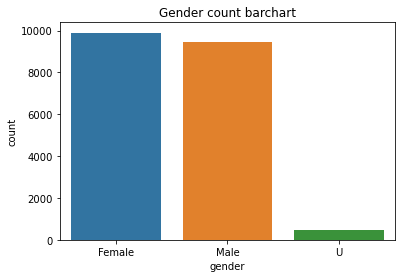

In [16]:
#Insights from the merged data...
import seaborn as sns 

# population count based on gender 
sns.countplot(x = 'gender', data = dataset)
plt.title('Gender count barchart')
plt.show()

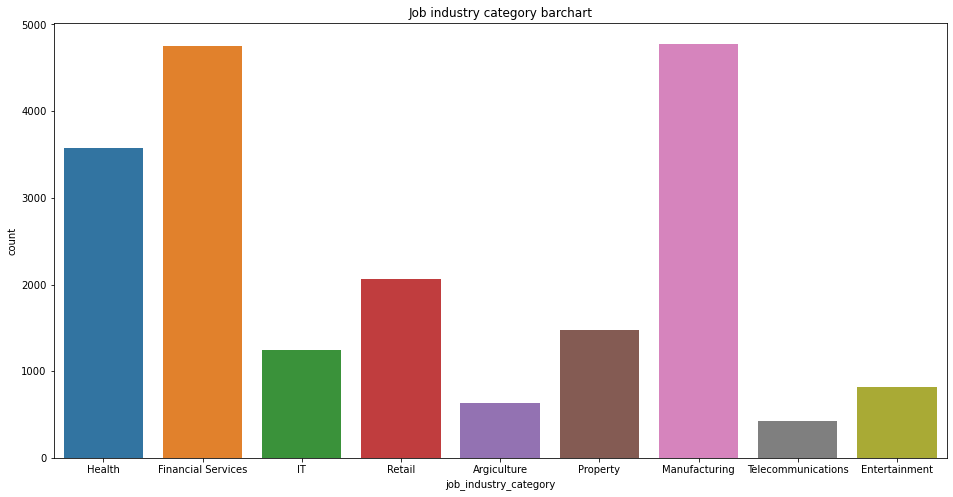

In [17]:
plt.figure(figsize = (16,8))
sns.countplot(x='job_industry_category', data = dataset)
plt.title('Job industry category barchart')
plt.show()

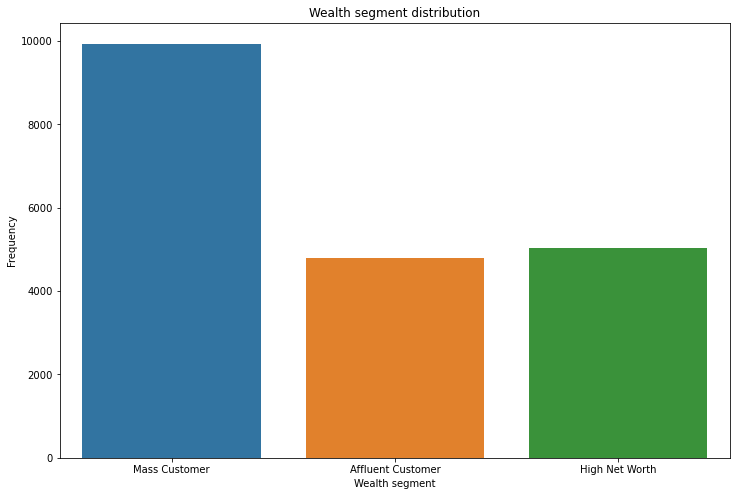

In [18]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'wealth_segment', data = dataset)
plt.title('Wealth segment distribution')
plt.xlabel('Wealth segment')
plt.ylabel('Frequency')
plt.show()

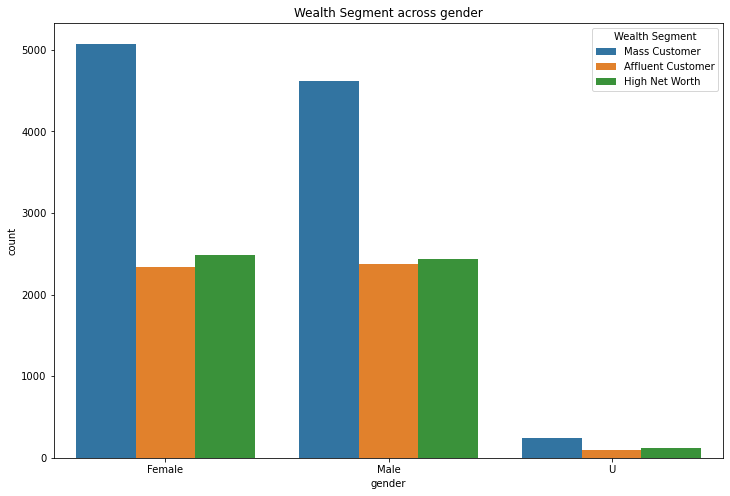

In [19]:
plt.figure(figsize = (12,8))
sns.countplot(x='gender', data=dataset, hue='wealth_segment')
plt.legend(title='Wealth Segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment across gender')
plt.show()

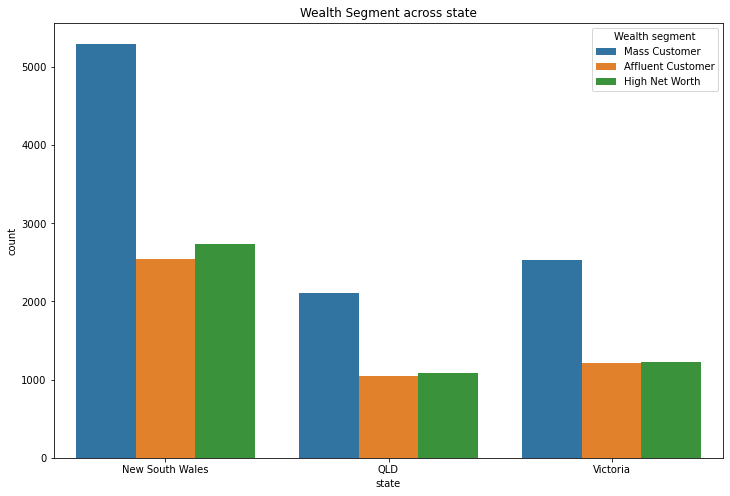

In [20]:
plt.figure(figsize = (12,8))
sns.countplot(x='state', data=dataset, hue='wealth_segment')
plt.legend(title='Wealth segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment across state')
plt.show()

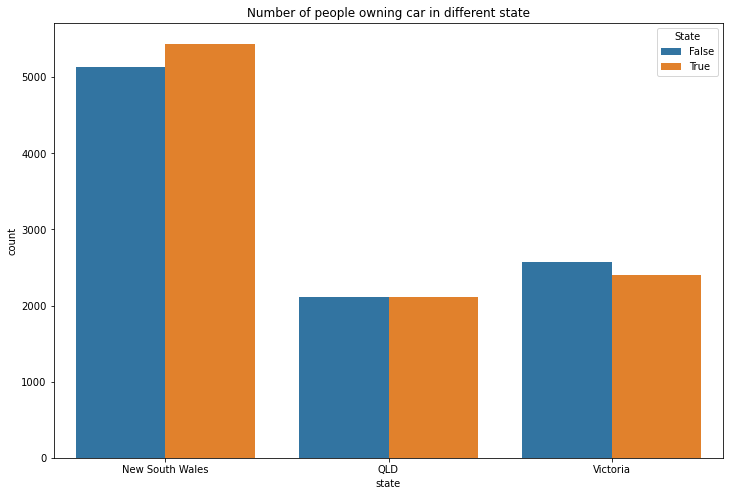

In [21]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'state', data = dataset, hue = 'owns_car')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.title('Number of people owning car in different state')
plt.show()

<Figure size 864x576 with 0 Axes>

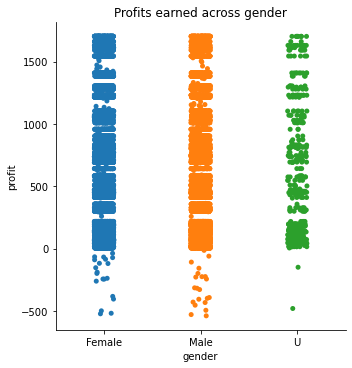

In [22]:
plt.figure(figsize = (12,8))
sns.catplot(data=dataset, x='gender', y='profit')
plt.title('Profits earned across gender')
plt.show()

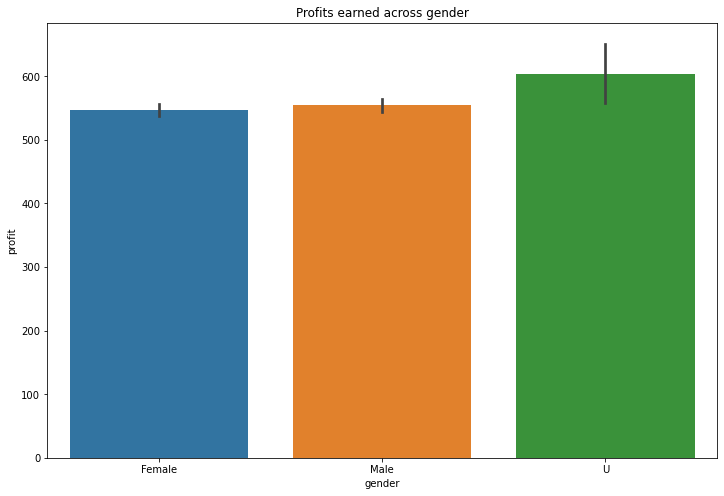

In [23]:
plt.figure(figsize = (12,8))
sns.barplot(data=dataset, x='gender', y='profit')
plt.title('Profits earned across gender')
plt.show()

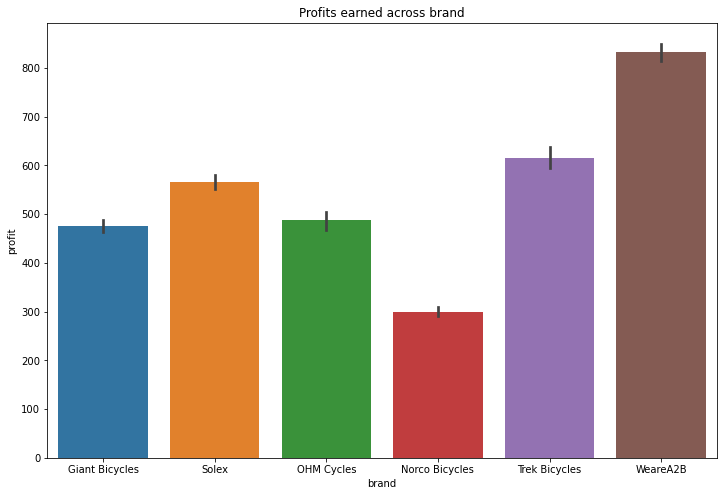

In [24]:
plt.figure(figsize = (12,8))
sns.barplot(data=dataset, x='brand', y='profit')
plt.title('Profits earned across brand')
plt.show()

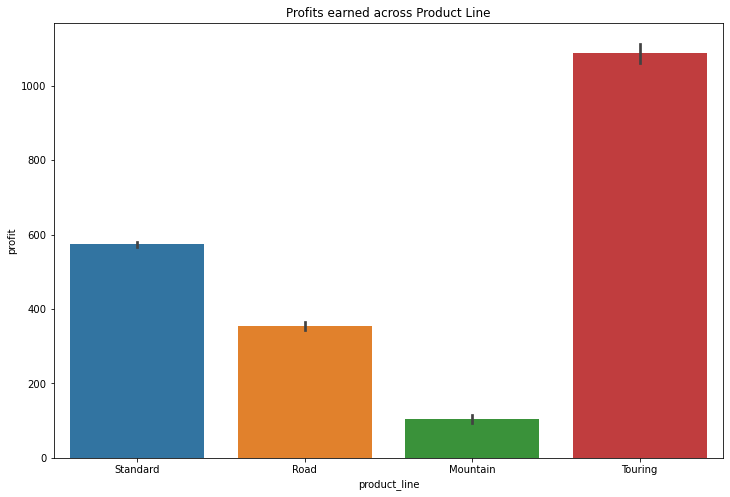

In [25]:
plt.figure(figsize = (12,8))
sns.barplot(data=dataset, x='product_line', y='profit')
plt.title('Profits earned across Product Line')
plt.show()

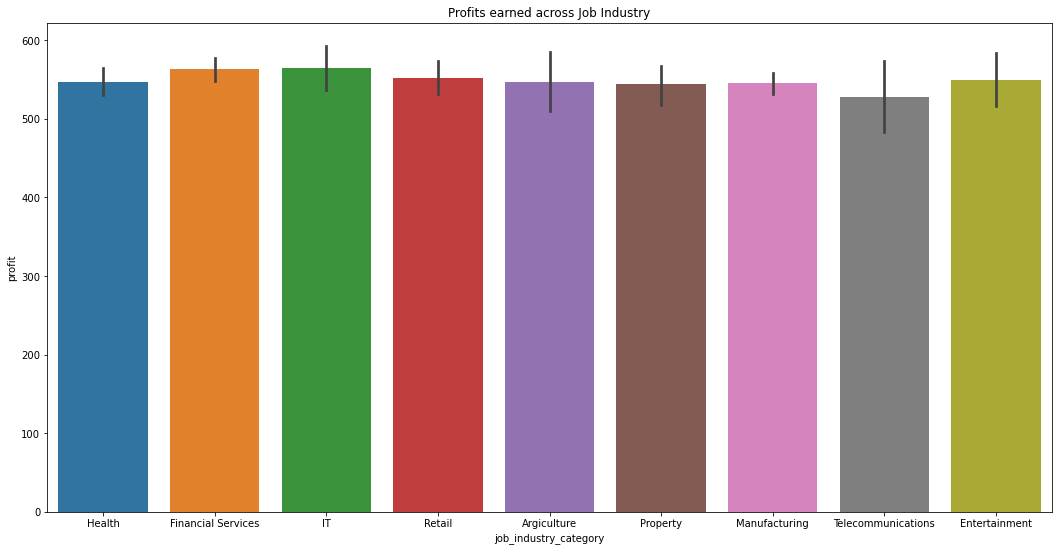

In [26]:
plt.figure(figsize = (18,9))
sns.barplot(data=dataset, x='job_industry_category', y='profit')
plt.title('Profits earned across Job Industry')
plt.show()

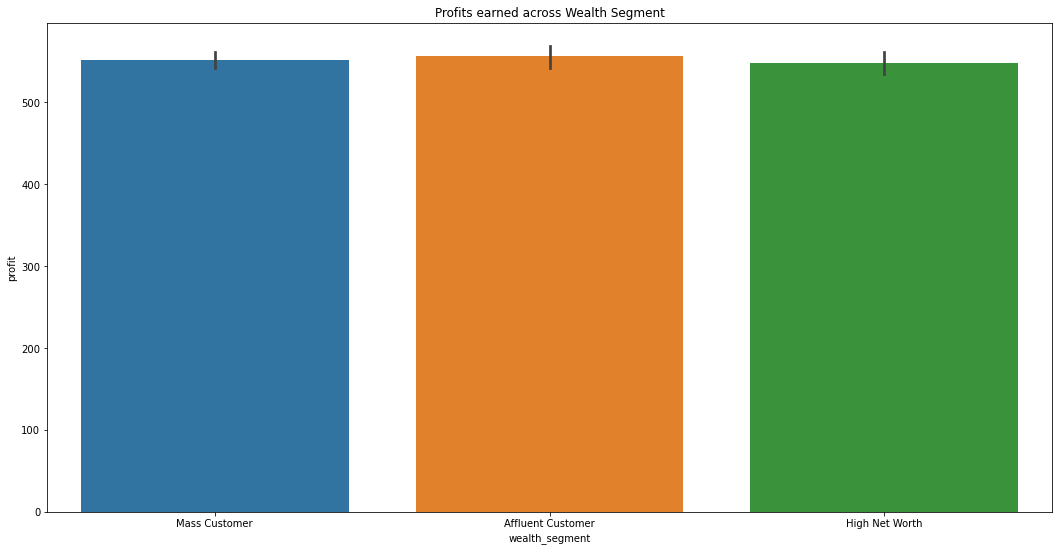

In [27]:
plt.figure(figsize = (18,9))
sns.barplot(data=dataset, x='wealth_segment', y='profit')
plt.title('Profits earned across Wealth Segment')
plt.show()

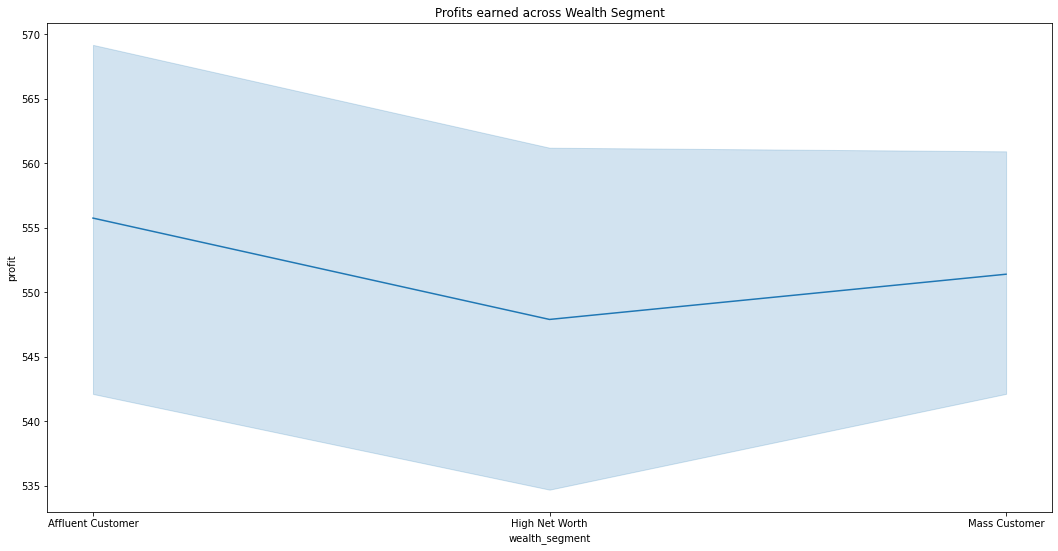

In [28]:
plt.figure(figsize = (18,9))
sns.lineplot(data=dataset, x='wealth_segment', y='profit')
plt.title('Profits earned across Wealth Segment')
plt.show()